In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [2]:
dataset=pd.read_csv('land.csv')

In [3]:
dataset=dataset[['CultLand','CropTillageDepth','Residue_length','Block']]
dataset.head(2)

,CultLand,CropTillageDepth,Residue_length,Block
0,45,5,30,6
1,26,5,24,7


In [4]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CultLand,CropTillageDepth,Residue_length,Block
CultLand,1.000000,0.024248,-0.117823,0.305298
CropTillageDepth,0.024248,1.000000,-0.027913,-0.022620
Residue_length,-0.117823,-0.027913,1.000000,-0.196507
Block,0.305298,-0.022620,-0.196507,1.000000


In [5]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [6]:
X.head()

,CultLand,CropTillageDepth,Residue_length
0,45,5,30
1,26,5,24
2,10,6,30
3,15,6,26
4,60,4,24


In [7]:
y

0       6
1       7
2       2
3       2
4       6
       ..
3865    7
3866    5
3867    6
3868    4
3869    3
Name: Block, Length: 3870, dtype: int64

In [8]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train

,CultLand,CropTillageDepth,Residue_length
1053,6,5,30
3213,5,4,30
22,19,4,23
1732,30,6,30
2800,65,6,25
...,...,...,...
1130,20,6,25
1294,12,5,30
860,20,6,25
3507,25,4,23


In [10]:
X_test

,CultLand,CropTillageDepth,Residue_length
2176,25,5,30
1421,38,2,26
2480,20,3,28
1586,5,4,30
952,100,5,25
...,...,...,...
361,35,4,25
135,60,6,30
1134,10,4,24
1151,20,7,30


In [11]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [15]:
X_train

array([[-0.70615044,  0.44735878,  1.10540035],
       [-0.73751767, -0.43530323,  1.10540035],
       [-0.29837653, -0.43530323, -1.10342018],
       ...,
       [-0.2670093 ,  1.33002079, -0.4723286 ],
       [-0.11017318, -0.43530323, -1.10342018],
       [-0.11017318, -1.31796524, -0.4723286 ]])

In [16]:
X_test

array([[-0.11017318,  0.44735878,  1.10540035],
       [ 0.29760074, -2.20062725, -0.15678281],
       [-0.2670093 , -1.31796524,  0.47430877],
       ...,
       [-0.58068155, -0.43530323, -0.78787439],
       [-0.2670093 ,  2.2126828 ,  1.10540035],
       [-0.11017318,  0.44735878,  0.47430877]])

## Model Training

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression=LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
## print the coefficients and the intercept
print(regression.coef_)

[ 0.62843866 -0.04910554 -0.3939854 ]


In [21]:
print(regression.intercept_)

4.51827242524917


In [22]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [23]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [24]:
reg_pred

array([3.99155595, 4.87512937, 4.22832213, ..., 4.4851365 , 3.80630687,
       4.24019681])

## Assumptions

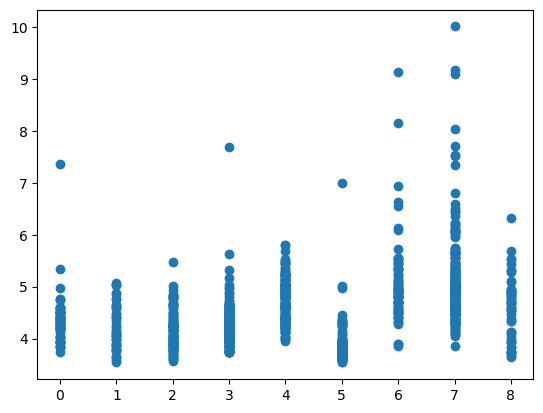

In [25]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [26]:
## Residuals
residuals=y_test-reg_pred

In [27]:
residuals

2176    1.008444
1421    2.124871
2480   -0.228322
1586    1.359348
952    -0.091586
          ...   
361     2.146375
135    -2.638146
1134    1.514863
1151   -1.806307
3276    0.759803
Name: Block, Length: 1161, dtype: float64

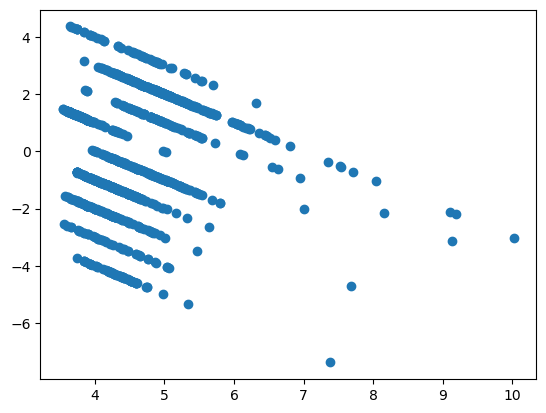

In [29]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.7740021055204973
4.21552216398439
2.053173680910699


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.1191352296248338


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [32]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.1168512241701013

In [33]:
X_test.shape

(1161, 3)

## New Data Prediction

In [35]:
a=[[9,22,4]]#.reshape(1,-1)

In [36]:
##transformation of new data
scaler.transform(a)

C:\Users\YUSUFF\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.61204877, 15.45261293, -7.09879022]])

In [37]:
regression.predict(scaler.transform(a))

C:\Users\YUSUFF\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.17164807])

## Pickling The Model file For Deployment

In [39]:
import pickle

In [40]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [41]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))